In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [5]:
train_images.shape

(60000, 28, 28, 1)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# one hotting encode
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# create model without padding in cnn layer
model = Sequential()
model.add(ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2)) # to prevent overfitting
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2)) # to prevent overfitting
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                        

In [9]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, batch_size=300, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
200/200 [==============================] - 137s 675ms/step - loss: 0.6638 - accuracy: 0.7579 - val_loss: 0.4300 - val_accuracy: 0.8483
Epoch 2/10
200/200 [==============================] - 125s 627ms/step - loss: 0.4194 - accuracy: 0.8522 - val_loss: 0.3584 - val_accuracy: 0.8701
Epoch 3/10
200/200 [==============================] - 124s 620ms/step - loss: 0.3628 - accuracy: 0.8701 - val_loss: 0.3278 - val_accuracy: 0.8819
Epoch 4/10
200/200 [==============================] - 120s 601ms/step - loss: 0.3297 - accuracy: 0.8808 - val_loss: 0.3066 - val_accuracy: 0.8893
Epoch 5/10
200/200 [==============================] - 126s 628ms/step - loss: 0.3096 - accuracy: 0.8886 - val_loss: 0.2836 - val_accuracy: 0.8981
Epoch 6/10
200/200 [==============================] - 128s 638ms/step - loss: 0.2896 - accuracy: 0.8957 - val_loss: 0.2719 - val_accuracy: 0.9000
Epoch 7/10
200/200 [==============================] - 122s 608ms/step - loss: 0.2785 - accuracy: 0.8975 - val_loss: 0.2648 -

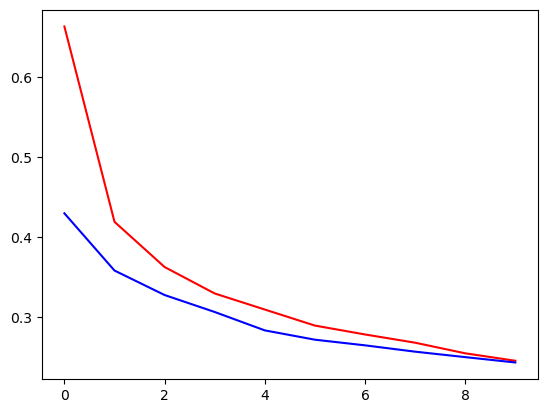

In [13]:
plt.plot(history.history['loss'], label='Loss Of Train Data', color='red')
plt.plot(history.history['val_loss'], label='Loss Of Test Data', color='blue')

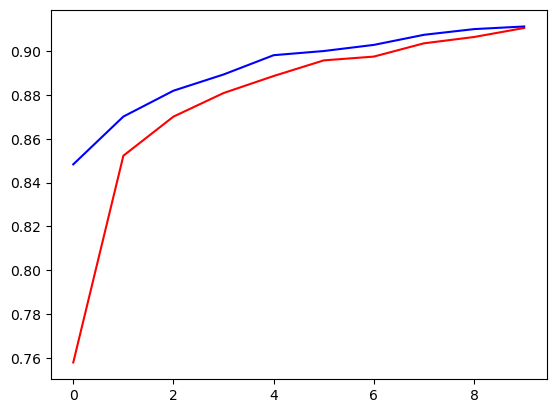

In [14]:
plt.plot(history.history['accuracy'], label='Accuracy Of Train Data', color='red')
plt.plot(history.history['val_accuracy'], label='Accuracy Of Test Data', color='blue')